## Data Analysis and Preprocessing

In [4]:
import pandas as pd
import matplotlib.pylab as plt
import os
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from models.scripts.utils import load_csv, drop_columns, impute_rolling_median, display_missing_values, save_to_csv

In [8]:
file_path = 'data/hourly/btc_lunarcrush_timeseries_hourly.csv'

df = load_csv(file_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 65 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   asset_id                   38656 non-null  int64         
 1   timestamp                  38656 non-null  int64         
 2   time                       38656 non-null  datetime64[ns]
 3   open                       38575 non-null  float64       
 4   close                      38656 non-null  float64       
 5   high                       38575 non-null  float64       
 6   low                        38575 non-null  float64       
 7   volume                     29967 non-null  float64       
 8   volume_24h                 30136 non-null  float64       
 9   market_cap                 38601 non-null  float64       
 10  circulating_supply         30408 non-null  float64       
 11  url_shares                 38474 non-null  float64       
 12  uniq

In [9]:
df.describe()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,social_volume_calc_24h,social_score_calc_24h
count,38656.0,3.865600e+04,38656,38575.000000,38656.000000,38575.000000,38575.000000,2.996700e+04,3.013600e+04,3.860100e+04,...,33674.000000,24109.000000,2.410800e+04,38656.000000,37898.000000,37866.000000,3.788400e+04,37884.000000,0.0,0.0
mean,1.0,1.637494e+09,2021-11-21 11:27:47.849751808,27729.672615,27707.667698,27829.158741,27625.151563,1.750238e+09,1.892501e+11,5.260254e+11,...,9901.385164,94.747853,5.217490e+04,11041.606038,49503.436224,28.016443,1.166456e+12,50.084601,NaN,NaN
min,1.0,1.567037e+09,2019-08-29 00:00:00,4545.087790,4267.292258,4589.712024,4267.292258,2.373622e+08,4.813293e+09,8.393765e+10,...,0.000000,1.000000,7.000000e+00,0.000000,717.000000,0.003876,1.223398e+11,16.059891,NaN,NaN
25%,1.0,1.602705e+09,2020-10-14 19:45:00,11842.623298,11862.473446,11857.641410,11825.501758,8.936159e+08,1.962372e+10,2.193665e+11,...,5040.250000,39.000000,1.985300e+04,4863.000000,14119.000000,18.032702,4.500118e+11,40.597149,NaN,NaN
50%,1.0,1.637494e+09,2021-11-21 11:30:00,26624.375459,26638.227945,26677.701083,26573.538931,1.429616e+09,2.847711e+10,5.179575e+11,...,9589.500000,77.000000,3.724150e+04,9715.000000,44911.500000,25.024232,1.090821e+12,48.167831,NaN,NaN
75%,1.0,1.672284e+09,2022-12-29 03:15:00,39736.849449,39640.679700,39893.966207,39543.541706,2.190108e+09,3.891479e+10,7.516046e+11,...,13345.000000,126.000000,6.215325e+04,14746.000000,73506.250000,36.914645,1.665817e+12,60.717419,NaN,NaN
max,1.0,1.707073e+09,2024-02-04 19:00:00,68843.221165,68610.174732,69114.233109,68682.417611,1.025374e+11,1.414339e+15,1.294632e+12,...,135323.000000,11593.000000,8.865258e+06,275425.000000,515359.000000,99.831309,7.290602e+12,76.977663,NaN,NaN
std,0.0,4.017324e+07,NaN,15552.015932,15506.036282,15623.167273,15476.869275,1.707107e+09,1.419517e+13,2.943482e+11,...,6390.307566,138.587695,1.030868e+05,8843.892710,37617.224012,13.115268,7.158432e+11,10.472387,NaN,NaN


In [10]:
print("Number of null values per column:")
counts = df.count().to_frame()
counts.columns = ['count']
counts['nulls'] = df.shape[0] - counts['count']
counts

Number of null values per column:


,count,nulls
asset_id,38656,0
timestamp,38656,0
time,38656,0
open,38575,81
close,38656,0
...,...,...
social_dominance,37866,790
market_cap_global,37884,772
market_dominance,37884,772
social_volume_calc_24h,0,38656


In [11]:
df.head()

,asset_id,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,...,social_contributors,influential_content,influential_content_score,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance,social_volume_calc_24h,social_score_calc_24h
0,1,1567036800,2019-08-29,9699.30,9492.81,9709.59,9344.69,NaN,NaN,1.704075e+11,...,NaN,NaN,NaN,36275,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1567123200,2019-08-30,9453.74,9587.25,9699.85,9368.27,NaN,NaN,1.721211e+11,...,NaN,NaN,NaN,34181,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1567209600,2019-08-31,9603.96,9624.54,9714.11,9512.03,NaN,NaN,1.724485e+11,...,NaN,NaN,NaN,28833,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1567296000,2019-09-01,9646.58,9768.36,9823.53,9578.66,NaN,NaN,1.748100e+11,...,NaN,NaN,NaN,31799,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1567382400,2019-09-02,9783.44,10387.50,10459.00,9764.76,NaN,NaN,1.854709e+11,...,NaN,NaN,NaN,37664,NaN,NaN,NaN,NaN,NaN,NaN


### Data Preparation


In [12]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
social_score_calc_24h,38656,100.000000
social_volume_calc_24h,38656,100.000000
tweet_score,35674,92.285803
search_average,33218,85.932326
medium,27742,71.766349
youtube,17730,45.866101
influential_content_score,14548,37.634520
influential_content,14547,37.631933
volume,8689,22.477752
volume_24h,8520,22.040563


In [13]:
# Assuming 'df' is your DataFrame
threshold = 25.0  # You can adjust the threshold as needed
df = drop_columns(df, threshold)

In [14]:
df.head()

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_contributors,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1567036800,2019-08-29,9699.30,9492.81,9709.59,9344.69,NaN,NaN,1.704075e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,36275,NaN,NaN,NaN,NaN
1,1567123200,2019-08-30,9453.74,9587.25,9699.85,9368.27,NaN,NaN,1.721211e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,34181,NaN,NaN,NaN,NaN
2,1567209600,2019-08-31,9603.96,9624.54,9714.11,9512.03,NaN,NaN,1.724485e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,28833,NaN,NaN,NaN,NaN
3,1567296000,2019-09-01,9646.58,9768.36,9823.53,9578.66,NaN,NaN,1.748100e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,31799,NaN,NaN,NaN,NaN
4,1567382400,2019-09-02,9783.44,10387.50,10459.00,9764.76,NaN,NaN,1.854709e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,37664,NaN,NaN,NaN,NaN


In [15]:
missing_values_df = display_missing_values(df)
missing_values_df

,Number of Missing Values,Percentage
volume,8689,22.477752
volume_24h,8520,22.040563
circulating_supply,8248,21.336921
social_contributors,4982,12.888038
reddit_comments_score,4640,12.003311
reddit_comments,4640,12.003311
reddit_posts,4510,11.667012
reddit_posts_score,4510,11.667012
news,1375,3.557016
social_score_24h_rank,822,2.126449


In [16]:
df_final = impute_rolling_median(df)

/Users/lucapetracca/Documents/GitHub/Transformers-Financial-Time-Series-Forecasting/models/scripts/utils.py:153: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[column].fillna(method='bfill', inplace=True)  # Backfill to address initial NaNs


In [17]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                38656 non-null  int64         
 1   time                     38656 non-null  datetime64[ns]
 2   open                     38656 non-null  float64       
 3   close                    38656 non-null  float64       
 4   high                     38656 non-null  float64       
 5   low                      38656 non-null  float64       
 6   volume                   29984 non-null  float64       
 7   volume_24h               38656 non-null  float64       
 8   market_cap               38656 non-null  float64       
 9   circulating_supply       38656 non-null  float64       
 10  url_shares               38656 non-null  float64       
 11  unique_url_shares        38656 non-null  float64       
 12  reddit_posts             37329 n

In [18]:
output_file_path = 'data/btc_timeseries.csv'  # Specify your desired path and file name
save_to_csv(df_final, output_file_path)

### Data Visualization

In [19]:
btc = pd.read_csv('data/btc_timeseries.csv')
btc.head()

,timestamp,time,open,close,high,low,volume,volume_24h,market_cap,circulating_supply,...,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_contributors,social_volume,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1567036800,2019-08-29 00:00:00,9699.30,9492.81,9709.59,9344.69,414776885.0,2.119802e+10,1.704075e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,36275,7988.0,41.199299,2.332637e+11,66.321895
1,1567123200,2019-08-30 00:00:00,9453.74,9587.25,9699.85,9368.27,414776885.0,2.119802e+10,1.721211e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,34181,7988.0,41.199299,2.332637e+11,66.321895
2,1567209600,2019-08-31 00:00:00,9603.96,9624.54,9714.11,9512.03,414776885.0,2.119802e+10,1.724485e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,28833,7988.0,41.199299,2.332637e+11,66.321895
3,1567296000,2019-09-01 00:00:00,9646.58,9768.36,9823.53,9578.66,414776885.0,2.119802e+10,1.748100e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,31799,7988.0,41.199299,2.332637e+11,66.321895
4,1567382400,2019-09-02 00:00:00,9783.44,10387.50,10459.00,9764.76,414776885.0,2.119802e+10,1.854709e+11,18461987.0,...,629.0,2.0,1.0,1.0,936.0,37664,7988.0,41.199299,2.332637e+11,66.321895


In [20]:
btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38656 entries, 0 to 38655
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                38656 non-null  int64  
 1   time                     38656 non-null  object 
 2   open                     38656 non-null  float64
 3   close                    38656 non-null  float64
 4   high                     38656 non-null  float64
 5   low                      38656 non-null  float64
 6   volume                   29984 non-null  float64
 7   volume_24h               38656 non-null  float64
 8   market_cap               38656 non-null  float64
 9   circulating_supply       38656 non-null  float64
 10  url_shares               38656 non-null  float64
 11  unique_url_shares        38656 non-null  float64
 12  reddit_posts             37329 non-null  float64
 13  reddit_posts_score       37329 non-null  float64
 14  reddit_comments       

In [21]:
def plot_price_and_social_volume(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Close Price', color=color)
    ax1.plot(df['time'], df['close'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:blue'
    ax2.set_ylabel('Social Volume', color=color)
    ax2.plot(df['time'], df['social_volume'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Close Price and Social Volume Trend')
    plt.show()

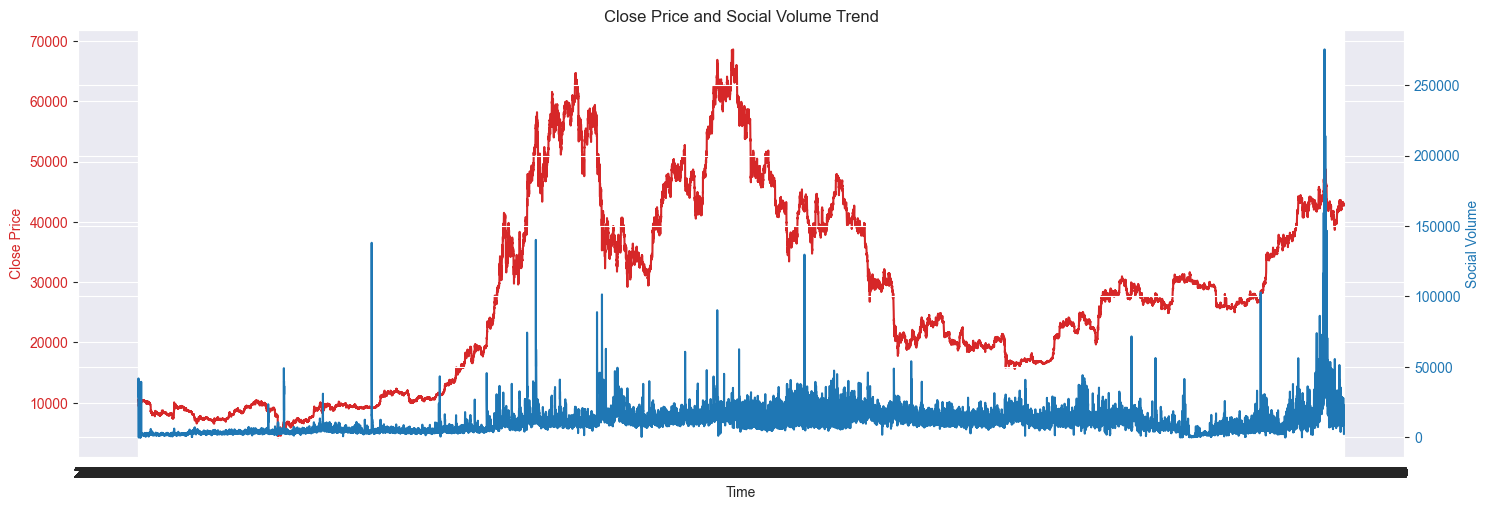

In [22]:
plot_price_and_social_volume(btc)

In [23]:
def plot_social_media_sentiment(df):
    fig, ax1 = plt.subplots(figsize=(15, 5))

    color = 'tab:green'
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Tweets', color=color)
    ax1.plot(df['time'], df['tweets'], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()

    color = 'tab:red'
    ax2.set_ylabel('Social Score', color=color)
    ax2.plot(df['time'], df['social_score'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title('Social Media Sentiment: Tweets and Social Score')
    plt.show()

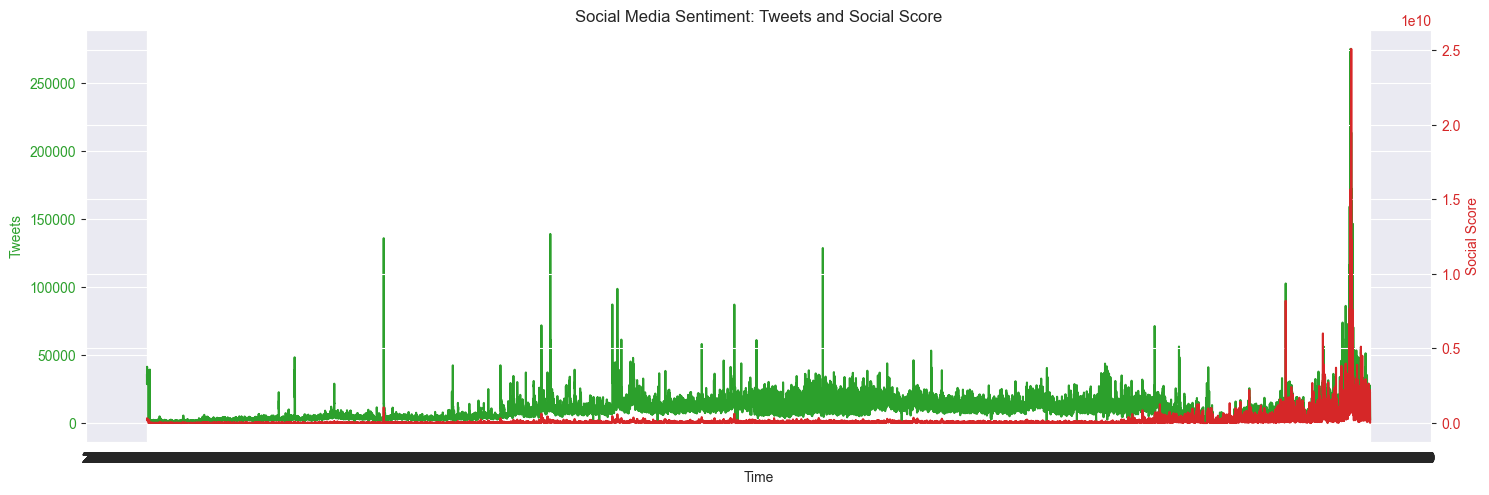

In [24]:
plot_social_media_sentiment(btc)

In [25]:
def plot_time_series_sentiment_vs_price(df, sentiment_score, price='close'):
    """
    Generates a time series plot overlaying sentiment scores with price changes.

    Parameters:
    - df: DataFrame with the cryptocurrency data including 'time', a sentiment score, and price.
    - sentiment_score: The column name of the sentiment score to plot.
    - price: The column name of the price to plot (default is 'close').
    """
    # Creating a figure and a twin axis for the second plot
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:red'
    ax1.set_xlabel('Time')
    ax1.set_ylabel(sentiment_score, color=color)
    ax1.plot(df['time'], df[sentiment_score], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(price, color=color)  # we already handled the x-label with ax1
    ax2.plot(df['time'], df[price], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'Time Series of {sentiment_score} and {price}')
    plt.show()

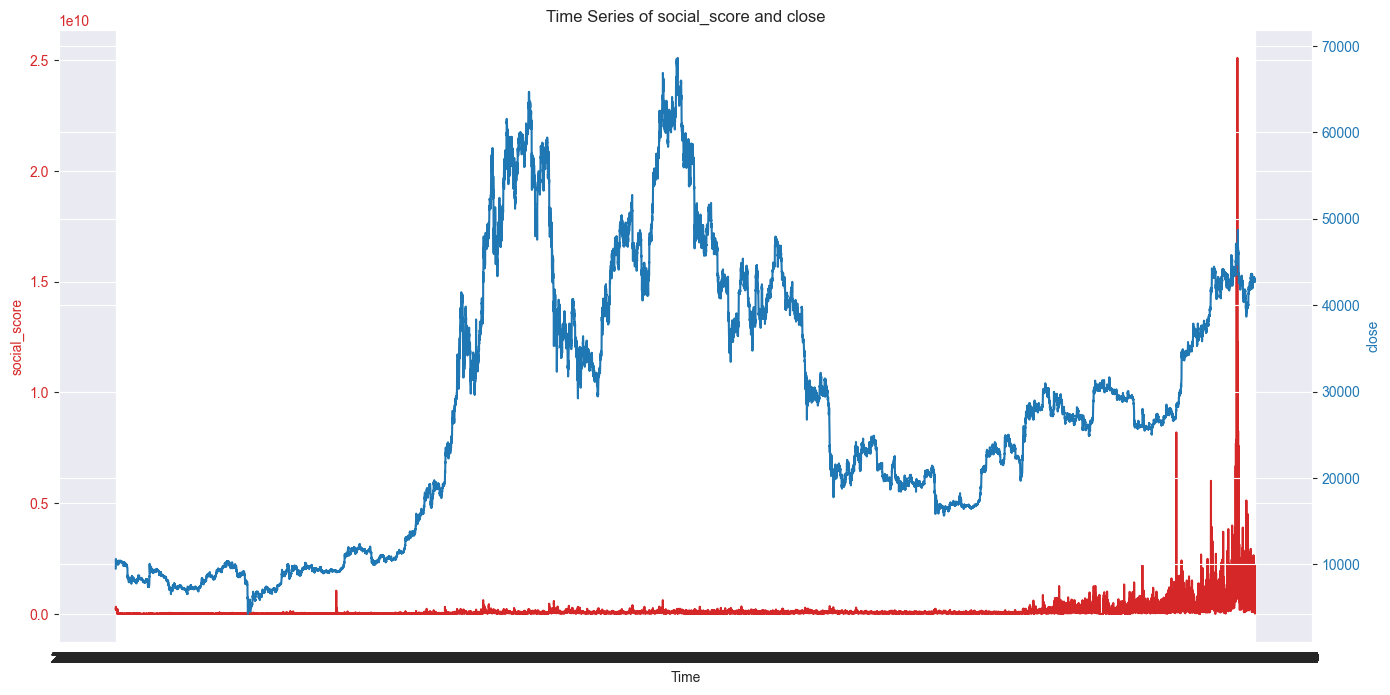

In [26]:
plot_time_series_sentiment_vs_price(btc, 'social_score', 'close')

## Cryptocurrencies Comparison

In [5]:
from models.scripts.utils import preprocess, trigonometric_date_encoding

file_paths = ['data/hourly/ada_lunarcrush_timeseries_hourly.csv', 'data/hourly/btc_lunarcrush_timeseries_hourly.csv', 'data/hourly/doge_lunarcrush_timeseries_hourly.csv', 'data/hourly/eth_lunarcrush_timeseries_hourly.csv', 'data/hourly/xmr_lunarcrush_timeseries_hourly.csv', 'data/hourly/xrp_lunarcrush_timeseries_hourly.csv', 'data/hourly/aave_lunarcrash_timeseries_hourly.csv']

columns_to_keep = ['timestamp', 'time', 'open', 'close', 'high', 'low', 'volume_24h', 'market_cap', 'social_contributors', 'social_volume', 'tweets', 'day', 'month', 'year', 'Month_Category_Bearish', 'Month_Category_Bullish', 'Month_Category_Normal', 'ROC_0', 'ROC_1', 'ROC_2']

crypto_dfs = {}
for path in file_paths:
    crypto = os.path.basename(path).split('_')[0]
    if os.path.exists(path):  # Check if the file exists
        crypto_dfs[crypto] = preprocess(path)
        crypto_dfs[crypto] = crypto_dfs[crypto][[col for col in crypto_dfs[crypto].columns if col in columns_to_keep]]
    else:
        print(f"File does not exist: {path}")  # For debugging

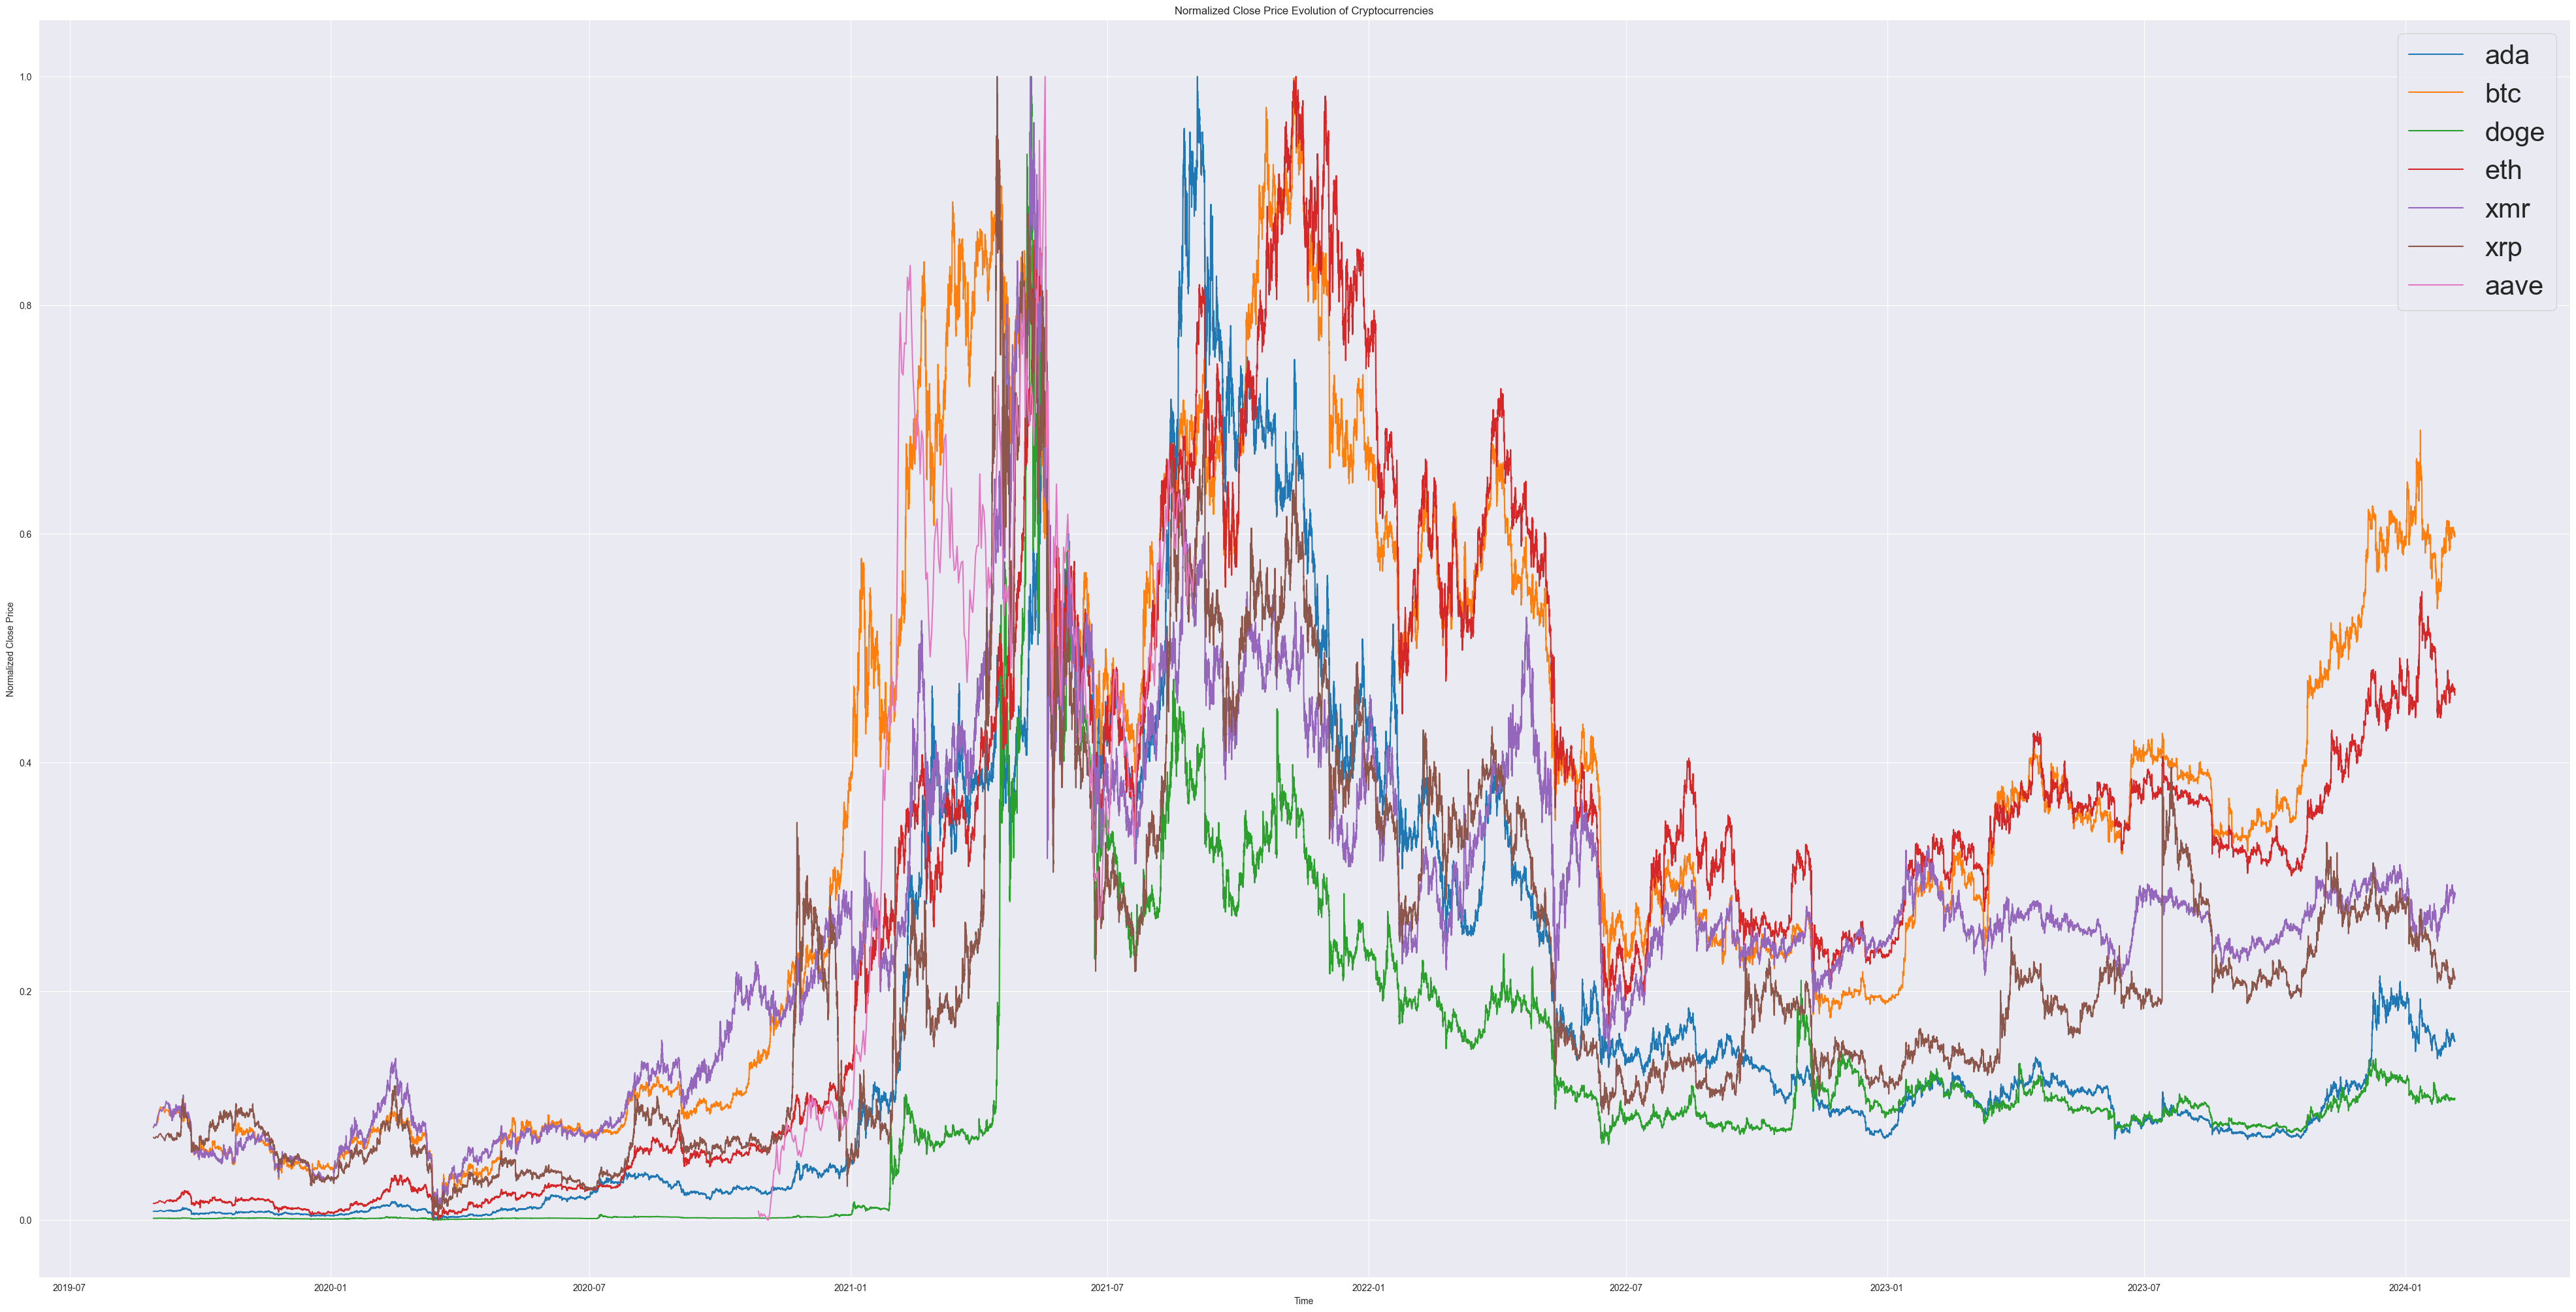

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50, 25))
for crypto, df in crypto_dfs.items():
    normalized_close = (df['close'] - df['close'].min()) / (df['close'].max() - df['close'].min())
    plt.plot(df['time'], normalized_close, label=crypto)
plt.title('Normalized Close Price Evolution of Cryptocurrencies')
plt.xlabel('Time')
plt.ylabel('Normalized Close Price')
plt.legend(fontsize=30)
plt.show()